# Fraud Detection

In this project of bank fraud detection, we used data generated by the Paysim simulator, made available on the [Kaggle platform](https://www.kaggle.com/datasets/ealaxi/paysim1). The selection of this dataset was based on its ability to accurately represent real-world financial transaction scenarios. The Paysim simulator is widely used as a benchmark tool to test the effectiveness of fraud detection models, ensuring the validity and relevance of the obtained results.

***
## About Dataset
### Content

step - unit of time (1 hour)</br>

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.</br>

amount - transaction amount in local currency.</br>

nameOrig - transaction originator</br>

oldbalanceOrg - initial balance (before transaction)</br>

newbalanceOrig - new balance (after transaction)</br>

nameDest - transaction recipient</br>

oldbalanceDest - initial balance before transaction.</br>

newbalanceDest - new balance after transaction.</br>

isFraud - Fraud agent takes control of customers accounts and attempts to empty it by transferring to another account and then cashing out.</br>

isFlaggedFraud - An illegal attempt to transfer massive amount of money in a single transaction.</br>

***

## Importing Libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from datetime import datetime

***
## Loading dataset

In [2]:
df = pd.read_csv("PS_20174392719_1491204439457_log.csv")

df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [3]:
df.shape

(6362620, 11)

***

## Checking null values

In [4]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


***

## Showing Statistics

In [6]:
df.describe().T.apply(lambda s: s.apply('{0:.5f}'.format))

,count,mean,std,min,25%,50%,75%,max
step,6362620.00000,243.39725,142.33197,1.00000,156.00000,239.00000,335.00000,743.00000
amount,6362620.00000,179861.90355,603858.23146,0.00000,13389.57000,74871.94000,208721.47750,92445516.64000
oldbalanceOrg,6362620.00000,833883.10407,2888242.67301,0.00000,0.00000,14208.00000,107315.17500,59585040.37000
newbalanceOrig,6362620.00000,855113.66858,2924048.50297,0.00000,0.00000,0.00000,144258.41000,49585040.37000
oldbalanceDest,6362620.00000,1100701.66652,3399180.11297,0.00000,0.00000,132705.66500,943036.70750,356015889.35000
newbalanceDest,6362620.00000,1224996.39820,3674128.94209,0.00000,0.00000,214661.44000,1111909.25000,356179278.92000
isFraud,6362620.00000,0.00129,0.03590,0.00000,0.00000,0.00000,0.00000,1.00000
isFlaggedFraud,6362620.00000,0.00000,0.00159,0.00000,0.00000,0.00000,0.00000,1.00000


***
## Counting occurrences of 'Flagged Frauds'

In [7]:
df.groupby('isFlaggedFraud').count()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
isFlaggedFraud,,,,,,,,,,
0,6362604,6362604,6362604,6362604,6362604,6362604,6362604,6362604,6362604,6362604
1,16,16,16,16,16,16,16,16,16,16


In [8]:
q = df.query('isFlaggedFraud == 1')
q

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


Due to the low number of occurrences of 'Flagged Frauds' in the dataset in question, it was decided not to use this class for classification in this example.

In [9]:
df.drop('isFlaggedFraud', axis=1, inplace=True)

***

## Counting occurrences of Frauds

In [10]:
df.groupby('isFraud').count()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
isFraud,,,,,,,,,
0,6354407,6354407,6354407,6354407,6354407,6354407,6354407,6354407,6354407
1,8213,8213,8213,8213,8213,8213,8213,8213,8213


The 'IsFraud' column is unbalanced. Solutions to this problem will be explored in this project.

***

## Checking Pearson correlation coefficient between columns

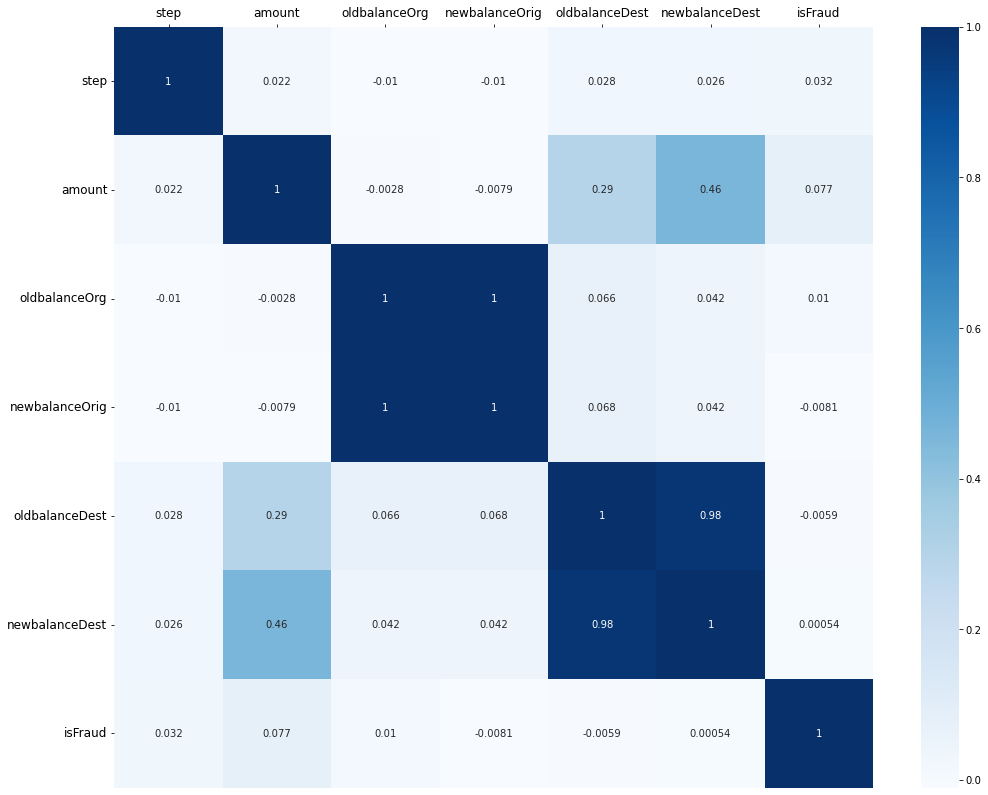

In [11]:
fig, ax = plt.subplots(figsize = (17,14))

ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
g = sns.heatmap(df.corr(), annot=True, cmap="Blues", cbar=True);
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 12);
g.set_xticklabels(g.get_xticklabels(), rotation = 0, fontsize = 12);

***

## Encoding

In [12]:
df_encoded = pd.get_dummies(data=df, columns=['type'])
df_encoded.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)
df_encoded.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


***

## Classification

In [13]:
x = df_encoded.drop('isFraud',  axis=1)
y = df_encoded['isFraud']
x.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT',
       'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')

In [14]:
SEED = 101

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = SEED)

In [15]:
def conf_matrix(y_test, y_pred, plot = True):
    
    cmlst = []
    
    cm = confusion_matrix(y_test, y_pred)
    cmlst.append(cm)
    
    cm_norm = confusion_matrix(y_test, y_pred, normalize='true')
    cmlst.append(cm_norm)
    
    if (plot==True):
        fig, ax = plt.subplots(1, 2)
        fig.set_size_inches(20,10)
        
        cbar_ax = fig.add_axes([.91, .15, .03, .7])
        hm = sns.heatmap(cm, annot=True, annot_kws={"size": 18},fmt='.12g', ax=ax[0], cmap="Blues", square=True, cbar=True,cbar_ax=cbar_ax); 
        
        ax[0].set_xlabel('Predicted label', fontsize=18);
        ax[0].set_ylabel('True label', fontsize=18); 
        ax[0].set_title('Confusion Matrix', fontsize=18); 
        ax[0].xaxis.set_ticklabels(['0', '1']); 
        ax[0].yaxis.set_ticklabels(['0', '1']);  
        
        hm2 = sns.heatmap(cm_norm, annot=True, annot_kws={"size": 18} , fmt='.2%', ax=ax[1], cmap="Blues", square=True, cbar_ax = cbar_ax); 
        
        ax[1].set_xlabel('Predicted label', fontsize=18);
        ax[1].set_ylabel('True label', fontsize=18); 
        ax[1].set_title('Normalized confusion matrix with percentage values', fontsize=18); 
        ax[1].xaxis.set_ticklabels(['0', '1']); 
        ax[1].yaxis.set_ticklabels(['0', '1']);  
    return cmlst

In [16]:
def model_metrics(model):
    
    y_pred = model.predict(x_test)
    
    lstMetrics = []
    lstMetrics.append(metrics.accuracy_score(y_test, y_pred))
    lstMetrics.append(metrics.precision_score(y_test, y_pred))
    lstMetrics.append(metrics.recall_score(y_test, y_pred))
    lstMetrics.append(metrics.f1_score(y_test, y_pred))
    
    df_metrics = pd.DataFrame(lstMetrics)
    df_metrics = df_metrics.T
    df_metrics = df_metrics.rename(columns={0: 'Accuracy Score', 
                                            1: 'Precision Score',
                                            2: 'Recall Score',
                                            3: 'F1 Score'})
    print(df_metrics.to_string(index=False) + '\n')
    
    conf_matrix(y_test, y_pred)

Logistic regression metrics:
 Accuracy Score  Precision Score  Recall Score  F1 Score
       0.998354         0.368325      0.419528  0.392263



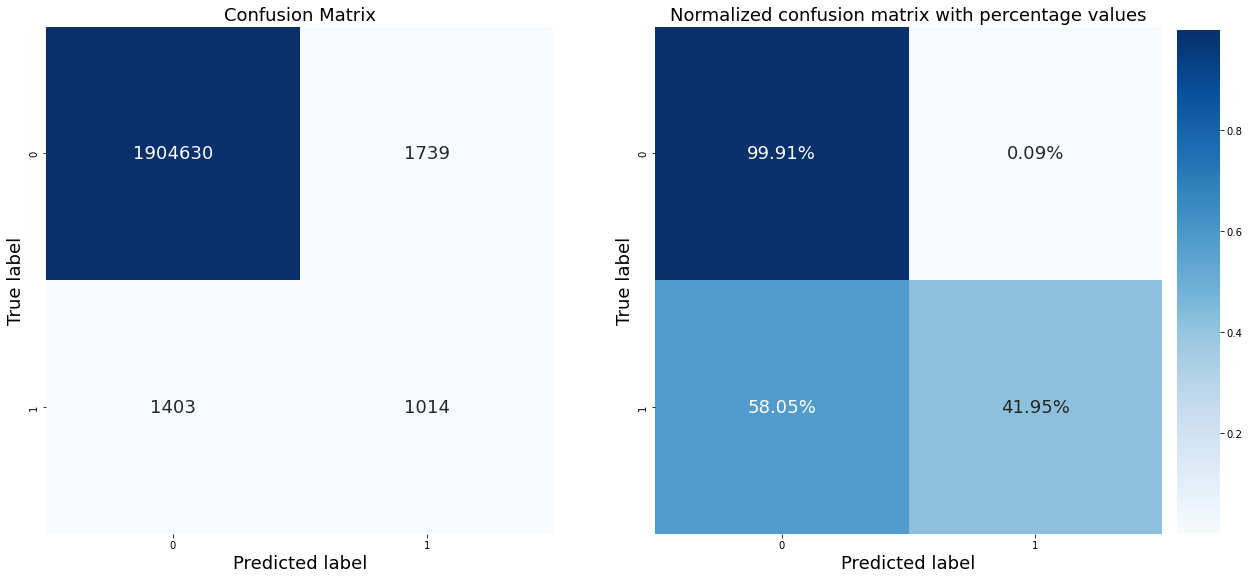

In [17]:
lr = LogisticRegression(max_iter=1000, random_state=SEED)
lr.fit(x_train, y_train)

print('Logistic regression metrics:')
model_metrics(lr)

In the first classification model, performance was compromised due to class imbalance in the data.</br>
Next, methods will be explored to solve this problem.

***
# Solving Imbalance problem
## Cost-Sensitive Learning

Logistic regression metrics:
 Accuracy Score  Precision Score  Recall Score  F1 Score
       0.911551         0.012623      0.891601  0.024893



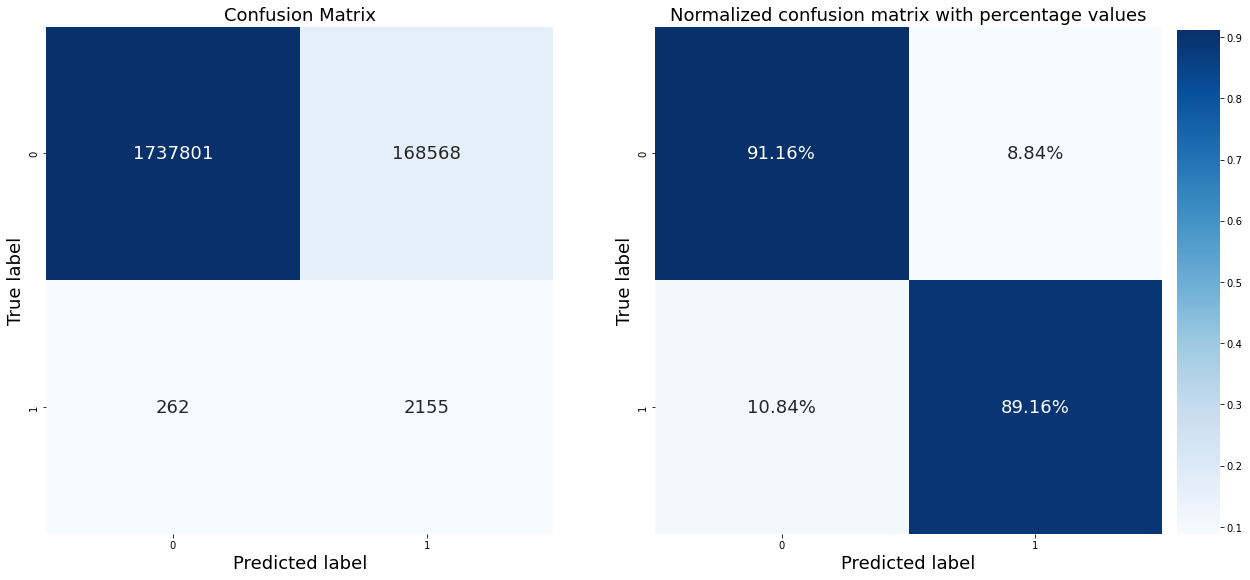

In [18]:
lr = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=SEED)
lr.fit(x_train, y_train)

print('Logistic regression metrics:')
model_metrics(lr)

## Oversampling with SMOTE

In [19]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=SEED)
x_resampled, y_resampled = smote.fit_resample(x_train,y_train)

To prevent information leakage, the SMOTE technique was only applied to the training data because the purpose of the test data is to simulate a real and unknown environment. By applying SMOTE to the test data, we would be introducing synthetic examples that do not accurately represent the distribution of the real data, compromising the model's ability to generalize correctly to new samples.

In [21]:
df_balanced = pd.concat([y_resampled, x_resampled], axis=1)
df_balanced.groupby('isFraud').count()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
isFraud,,,,,,,,,,,
0,4448038,4448038,4448038,4448038,4448038,4448038,4448038,4448038,4448038,4448038,4448038
1,4448038,4448038,4448038,4448038,4448038,4448038,4448038,4448038,4448038,4448038,4448038


In [22]:
t1 = datetime.now()
lr = LogisticRegression(max_iter=1000, random_state=SEED)
lr.fit(x_resampled, y_resampled)
t2 = datetime.now()
fit_time = (t2-t1).total_seconds()
print('Trained. Elapsed time: {:.2f}'.format(fit_time))

Trained. Elapsed time: 47.82


Logistic regression metrics:
 Accuracy Score  Precision Score  Recall Score  F1 Score
       0.915615         0.013266      0.894497  0.026143



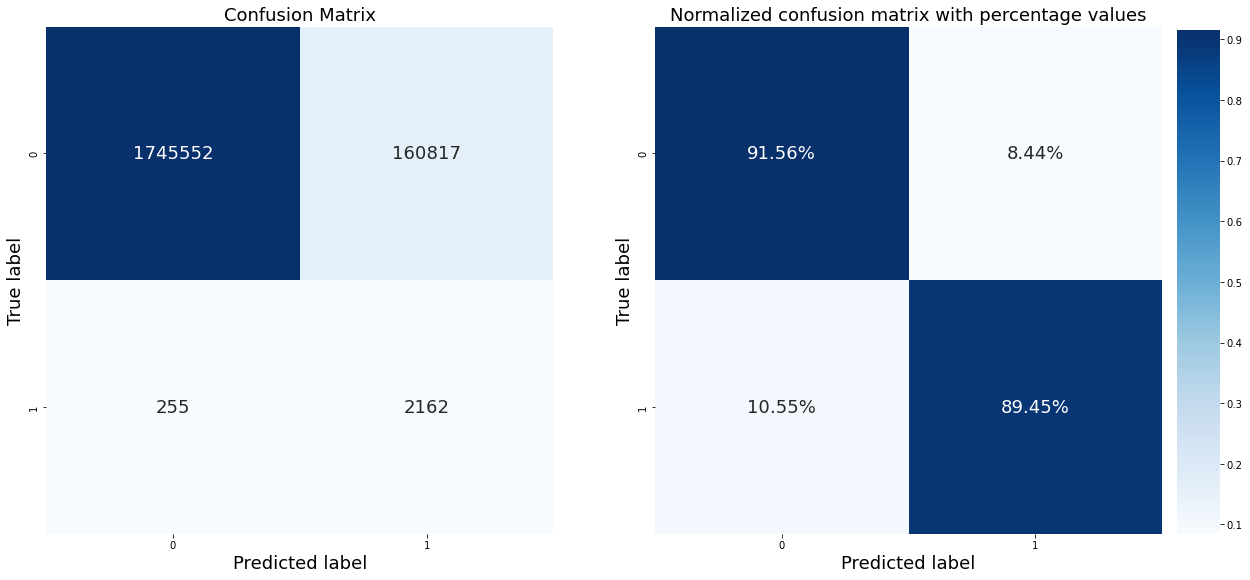

In [23]:
print('Logistic regression metrics:')
model_metrics(lr)

Due to the improved performance achieved by using the SMOTE technique to address class imbalance, the synthetic data generated will be used in the subsequent steps.

***

## Testing different classification algorithms

In [24]:
models = [
    LogisticRegression(max_iter=1000, random_state=SEED),
    DecisionTreeClassifier(random_state=SEED),
    KNeighborsClassifier(),
    GaussianNB()
]

In [25]:
scores = []
for i, m in enumerate(models):
    
    t1 = datetime.now()
    m.fit(x_resampled, y_resampled)
    t2 = datetime.now()
    fit_time = (t2-t1).total_seconds()
    
    print('{} trained. Elapsed time: {:.2f}'.format(m.__class__.__name__,fit_time))
    
    y_pred = m.predict(x_test)
    
    score = []
    score.append(m.__class__.__name__)
    score.append(metrics.accuracy_score(y_test, y_pred))
    score.append(metrics.precision_score(y_test, y_pred))
    score.append(metrics.recall_score(y_test, y_pred))
    score.append(metrics.f1_score(y_test, y_pred))
    score.append(fit_time)
    score.append(conf_matrix(y_test, y_pred, False))
    
    scores.append(score)

LogisticRegression trained. Elapsed time: 46.80
DecisionTreeClassifier trained. Elapsed time: 94.09
KNeighborsClassifier trained. Elapsed time: 43.85
GaussianNB trained. Elapsed time: 2.48


In [26]:
df_models = pd.DataFrame(scores, columns=['Model_Name', 'Accuracy', 'Precision', 'Recall', 'F1', 'Fit_Time', 'Conf_Matrix'])
df_models

,Model_Name,Accuracy,Precision,Recall,F1,Fit_Time,Conf_Matrix
0,LogisticRegression,0.915615,0.013266,0.894497,0.026143,46.799890,"[[[1745552, 160817], [255, 2162]], [[0.9156422..."
1,DecisionTreeClassifier,0.999402,0.687998,0.965246,0.803375,94.093968,"[[[1905311, 1058], [84, 2333]], [[0.9994450182..."
2,KNeighborsClassifier,0.995202,0.195318,0.894084,0.320599,43.852477,"[[[1897466, 8903], [256, 2161]], [[0.995329865..."
3,GaussianNB,0.965703,0.017140,0.462971,0.033056,2.477378,"[[[1842201, 64168], [1298, 1119]], [[0.9663401..."


In [27]:
np.set_printoptions(suppress = True)
for i in range(df_models.shape[0]):
    print('Model_Name: {}'.format(df_models.Model_Name[i]))
    
    #print(df_models.Conf_Matrix[i][0])
    print(df_models.Conf_Matrix[i][1])
    print('\n')

Model_Name: LogisticRegression
[[0.91564225 0.08435775]
 [0.10550269 0.89449731]]


Model_Name: DecisionTreeClassifier
[[0.99944502 0.00055498]
 [0.03475383 0.96524617]]


Model_Name: KNeighborsClassifier
[[0.99532987 0.00467013]
 [0.10591643 0.89408357]]


Model_Name: GaussianNB
[[0.9663402  0.0336598 ]
 [0.53702938 0.46297062]]




After conducting tests, it was found that the Decision Tree Classifier performed the best, achieving the highest metrics. As part of the improvement process, the Random Forest Classifier will be tested to determine if it can provide even better performance.

***

## Hyperparameter Optimization With Random Search and Random Forest Classifier




In [28]:
n_estimators = np.arange(20, 250, step=20)
criterion = ["gini", "entropy"]
max_features = ["auto", "sqrt", "log2"]
max_depth = list(np.arange(2, 10, step=1))
bootstrap = [True, False]

param_grid = {
    "n_estimators": n_estimators,
    "criterion": criterion,
    "max_features": max_features,
    "max_depth": max_depth,
    "bootstrap": bootstrap,
}

In [29]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
rf = RandomForestClassifier(random_state = SEED)
scoring = {'recall': make_scorer(recall_score), "accuracy": make_scorer(accuracy_score)}

random_cv = RandomizedSearchCV(rf, param_grid, n_iter=48, cv=3, scoring=scoring, refit="recall", n_jobs=4, random_state = SEED)


t1 = datetime.now()
rcv = random_cv.fit(x_resampled, y_resampled)
t2 = datetime.now()

fit_time = (t2-t1).total_seconds()
print('Trained. Elapsed time: {:.2f}'.format(fit_time))

Trained. Elapsed time: 60725.93


In [36]:
results = pd.DataFrame(rcv.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,param_criterion,param_bootstrap,params,...,split2_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,1901.074265,2.488709,31.377098,0.164551,140,log2,6,entropy,False,"{'n_estimators': 140, 'max_features': 'log2', ...",...,0.984785,0.984753,0.000422,20,0.972472,0.972364,0.971479,0.972105,0.000445,22
1,1850.780271,37.036940,42.301317,0.154561,240,log2,4,entropy,True,"{'n_estimators': 240, 'max_features': 'log2', ...",...,0.971680,0.971875,0.000181,32,0.957078,0.957565,0.957558,0.957400,0.000228,35
2,380.341165,19.033122,6.217903,0.010220,20,sqrt,8,entropy,False,"{'n_estimators': 20, 'max_features': 'sqrt', '...",...,0.991460,0.993061,0.002136,17,0.985601,0.983184,0.983864,0.984217,0.001018,13
3,2754.225379,81.029815,37.871721,0.428632,160,sqrt,9,gini,False,"{'n_estimators': 160, 'max_features': 'sqrt', ...",...,0.996616,0.996712,0.000178,9,0.988884,0.988618,0.989261,0.988921,0.000264,4
4,1486.704839,77.740778,25.264944,0.275498,140,auto,4,entropy,False,"{'n_estimators': 140, 'max_features': 'auto', ...",...,0.970577,0.970844,0.000221,33,0.956181,0.956536,0.956130,0.956282,0.000181,36
5,1617.790697,41.804716,34.640372,0.071195,180,auto,5,gini,True,"{'n_estimators': 180, 'max_features': 'auto', ...",...,0.968265,0.969417,0.000948,34,0.968752,0.967645,0.967314,0.967903,0.000615,26
6,1561.935689,25.100960,35.461842,0.538318,200,log2,4,entropy,True,"{'n_estimators': 200, 'max_features': 'log2', ...",...,0.973166,0.973390,0.000193,30,0.957177,0.957578,0.957546,0.957433,0.000182,34
7,1745.127980,5.233383,31.654023,0.110992,140,auto,8,entropy,True,"{'n_estimators': 140, 'max_features': 'auto', ...",...,0.996906,0.996642,0.000310,10,0.983482,0.984127,0.984061,0.983890,0.000290,14
8,1298.610305,4.135614,25.735849,0.083888,120,log2,7,gini,True,"{'n_estimators': 120, 'max_features': 'log2', ...",...,0.988954,0.987804,0.001038,19,0.979053,0.980205,0.980221,0.979826,0.000547,19
9,1084.100440,1.620451,23.407409,0.026210,120,sqrt,5,entropy,True,"{'n_estimators': 120, 'max_features': 'sqrt', ...",...,0.981874,0.982178,0.000613,22,0.964571,0.964771,0.964240,0.964527,0.000219,29


In [31]:
rcv.best_params_

{'n_estimators': 220,
 'max_features': 'sqrt',
 'max_depth': 9,
 'criterion': 'entropy',
 'bootstrap': False}

 Accuracy Score  Precision Score  Recall Score  F1 Score
       0.976364          0.05049      0.992139  0.096089



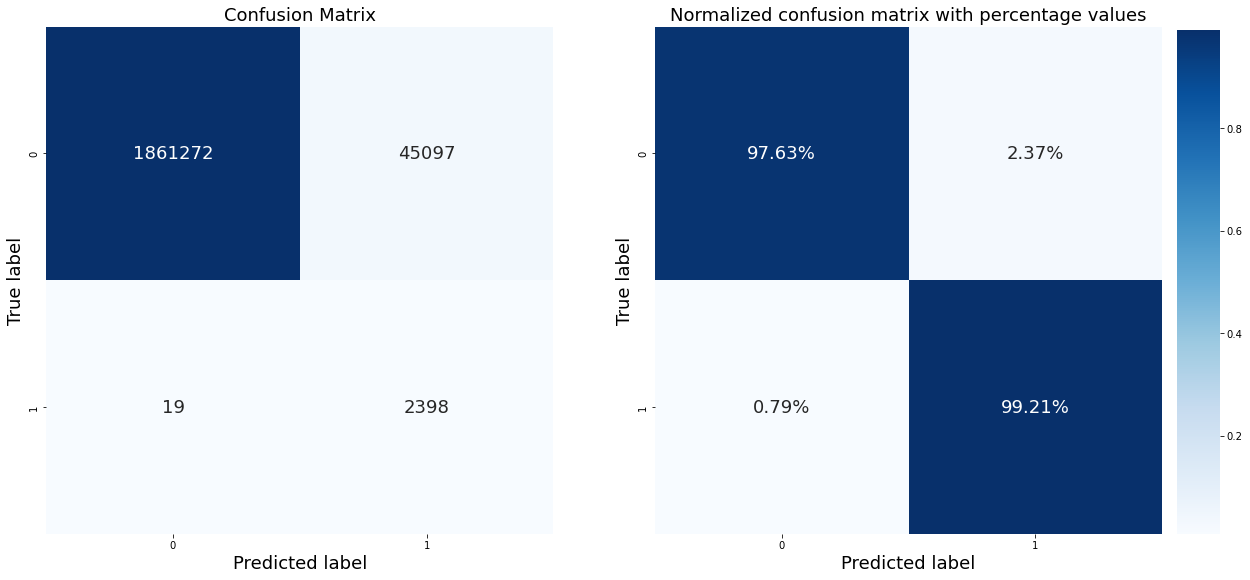

In [32]:
best_model = rcv.best_estimator_
model_metrics(best_model)

## Final Conclusions

We observed that the model exhibited a high number of true positives (TP), approximately 99.21%, meaning it correctly detected bank frauds. This is a promising result, as minimizing false negatives is crucial in this context. </br> However, we also noticed a considerable number of false positives (FP), approximately 2.37%, where legitimate transactions were mistakenly classified as frauds. This can lead to inconveniences for customers and generate additional costs for the bank. </br>
For an academic project, the obtained results were significant. However, considering the application in a real-world fraud detection scenario, it is important to conduct a more in-depth analysis and seek strategies to enhance the model's accuracy in correctly identifying legitimate transactions. This will ensure a more precise and reliable approach to tackling the challenge of bank fraud. This additional analysis may involve exploring advanced machine learning techniques, such as using more sophisticated classification algorithms, as well as collecting additional data to improve sample representativeness.